# EDA with Python and applying Logistic Regression

We'll be trying to predict a classification: survival or desceased. Let's begin our understanding of implementing Logistic Regression in Python for classification on the Titanic data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# The Data
Let's start by reading in the titanic_train.csv file into pandas dataframe.

In [2]:
train = pd.read_csv(r"C:\Users\nikhi\Downloads\train.csv")
print("Data Loaded")

Data Loaded


In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Exploratory Data Analysis
Let's begin some exploratory, data analysis we'll start by checking out missing data.

### Misssing Data 
We can use seaborn to create a simple heatmap to see where we are having the missing data

In [4]:
train.shape

(891, 12)

In [5]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

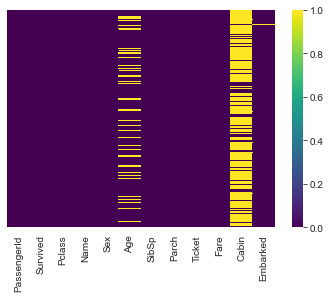

In [6]:
sns.set_style('whitegrid')
sns.heatmap(train.isnull(), yticklabels=False, cmap='viridis')
plt.show()

Roughly 20% of the Age column data is missing. The proportion of age missng is likely small enough for reasonable replacement with some form of imputation looking at the Cabin column, it looks like we are just missing too much of that data to do something useful with at a basic level we'll probably drop this later or change it to another.<br><br>
Let's continue on by visualizing some more of the data. 

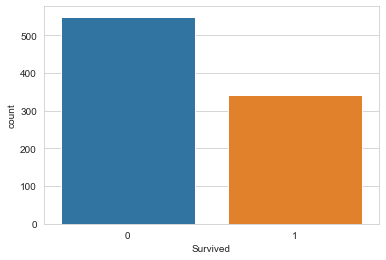

In [7]:
# Visualizing how many people survived or not
sns.set_style('whitegrid')
sns.countplot(x='Survived', data=train)
plt.show()

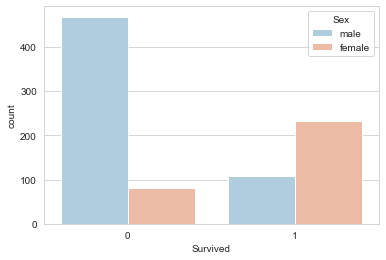

In [8]:
# Visualizing how many people survived based on the sex 

sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Sex', data=train, palette='RdBu_r')
plt.show()

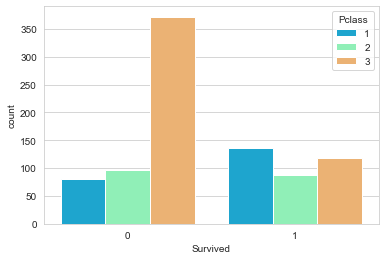

In [9]:
# Visualizing how many people survived based on the Passenger class

sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Pclass', data=train, palette='rainbow')
plt.show()

C:\Users\nikhi\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


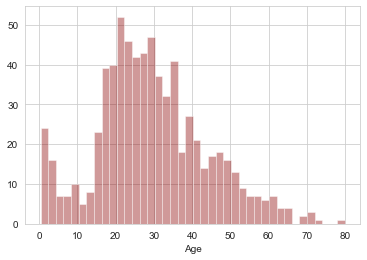

In [10]:
# Visualizing the distribution of the age
sns.distplot(train['Age'].dropna(), kde=False, color='darkred', bins=40)
plt.show()

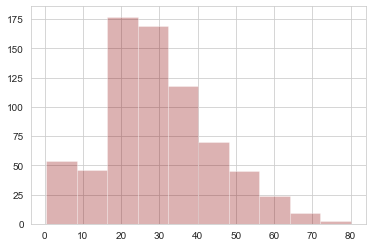

In [11]:
# Visualizing the age more closely 

train['Age'].hist(bins=10, color='darkred', alpha=0.3)
plt.show()

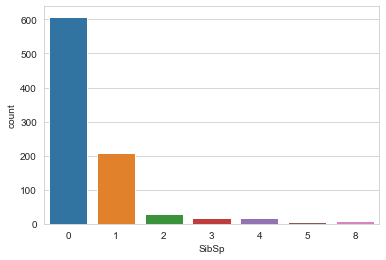

In [12]:
sns.countplot(x='SibSp', data=train)
plt.show()

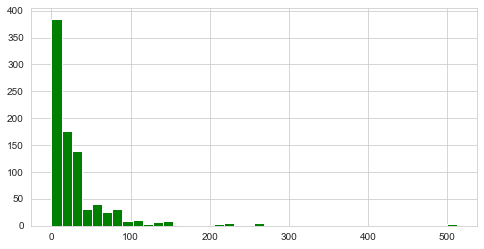

In [13]:
# Visualizing the Fare to check the how average people bought the tickets
train['Fare'].hist(color='green', bins=40, figsize=(8, 4))
plt.show()

### Data Cleaning
We want to fill in missing values of Age column of the data instead of just dropping the missing rows of Age columns, One way to do this is by filling in the mean age of all the passengers (Imputation). However we can be smarter about this and check the average age by passenger class.

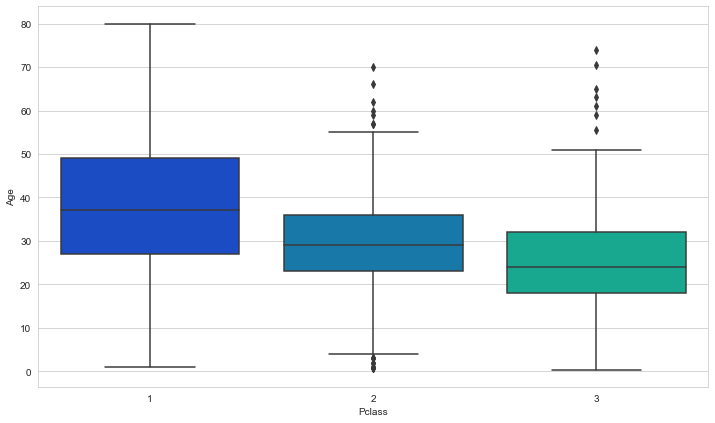

In [14]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass', y='Age', data=train, palette='winter')
plt.show()

In [15]:
# Getting the average age of the passengers in the class

train.groupby('Pclass').mean()

,PassengerId,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,,
1,461.597222,0.629630,38.233441,0.416667,0.356481,84.154687
2,445.956522,0.472826,29.877630,0.402174,0.380435,20.662183
3,439.154786,0.242363,25.140620,0.615071,0.393075,13.675550


We can see the weather passenger in the higher classes tend to be older which makes sense. We'll use these average age values to impute based on Pclass for Age

In [16]:
def impute_age(cols):
    """
    This function will clean the age column of the data 
    It'll fill in the null values.
    """
    
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else :
            return 24
    else :
        return Age

In [17]:
# Applying the impute-function to fill the na values of the age column

train['Age'] = train[['Age', 'Pclass']].apply(impute_age, axis=1)

Now checking the heatmap again to cross check if filled the na values oe not

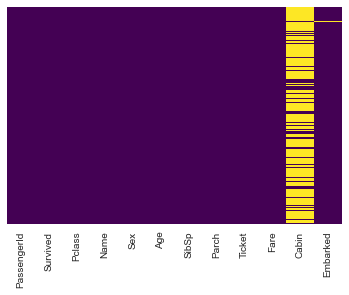

In [18]:
sns.set_style('whitegrid')
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.show()

Great Let's go ahead and drop the Cabin column and the row in Embarked that is NaN.

In [19]:
train.drop('Cabin', axis=1, inplace=True)

In [20]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


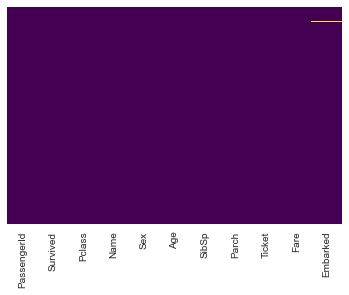

This plot presents that the we've no null values in the data


In [21]:
# Checking the null values again id there are any null values

sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.show()
print("This plot presents that the we've no null values in the data")

In [22]:
# Dropping the Na values 

train.dropna(inplace=True)

#### Converting Categorical Features
We'll need to convert categorical feature to dummy variables using pandas!, Otherwise our machine learning algorithm won't be able to directly take in those features as inputs.

In [23]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [24]:
# creating the list of object dtypees of the features of the data

object_data_list = [col for col in train if train[col].dtypes=='object']

object_data_list

['Name', 'Sex', 'Ticket', 'Embarked']

In [25]:
# creating dummies data for the Embarked features and also dropping the old 
# column of the data

pd.get_dummies(train['Embarked'], drop_first=True).head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [26]:
# Appending the object data types feeatures

sex = pd.get_dummies(train['Sex'], drop_first=True)
embark = pd.get_dummies(train['Embarked'], drop_first=True)

In [27]:
# Dropping the all unneccesary columns

train.drop(['Sex', 'Embarked', 'Name', 'Ticket'], axis=1, inplace=True)

In [28]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [29]:
# concatening the data

train = pd.concat([train, sex, embark], axis=1)

In [30]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


Now our data is ready for the model building

### Building a Logistic Regression Model
Let's start by splitting our data into a training set and test set 

#### Train Test Split

In [31]:
x = train.drop('Survived', axis=1)
y = train['Survived']

In [32]:
from sklearn.model_selection import train_test_split

# Performing the train and split method
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, 
                                                    random_state=10)

#### Training and predicting

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
logmodel = LogisticRegression()
logmodel.fit(x_train, y_train)

C:\Users\nikhi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [35]:
prediction = logmodel.predict(x_test)

In [36]:
from sklearn.metrics import confusion_matrix

In [37]:
accuracy = confusion_matrix(y_test, prediction)

accuracy

array([[154,  15],
       [ 34,  64]], dtype=int64)

In [38]:
from sklearn.metrics import accuracy_score

In [39]:
# Accuracy of the model 

model_accuracy = accuracy_score(y_test, prediction)

model_accuracy

0.8164794007490637

### Building a XGboost Model


In [40]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [41]:
# Creating the model

data_dmatrix = xgb.DMatrix(data=x, label=y)

In [42]:
# Using the train and split method again but the random state will be 
# different

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, 
                                                    random_state=123)


In [43]:
# instantiating the XGBoost regressor object by calling the XGBRegressor()
xg_reg = xgb.XGBRegressor(objective = 'reg:linear', colsample_bytree=0.3, 
                          learning_rate=0.1, max_depth=5, alpha=10, 
                          n_estimator=10)

In [44]:
# Fitting the regressor to the training set and make predictions on the test 
# set using the fit

xg_reg.fit(x_train, y_train)
preds = xg_reg.predict(x_test)

[08:10:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[08:10:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




In [45]:
# computing the rmse (root mean square error) using the mean_square_error 
# sklearn metric

rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE : %f"%(rmse)) 

RMSE : 0.388912


In [46]:
# creating the dictionary of parameters

params = {"objective":"reg:linear","colsample_bytree":0.3,"learning_rate":0.1
        , "max_depth":5, "alpha":10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3, 
                    num_boost_round=50, early_stopping_rounds=10, 
                    metrics="rmse", as_pandas=True, seed=123)

[08:10:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[08:10:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[08:10:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.


In [47]:
cv_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,0.485019,0.000296,0.485057,0.000161
1,0.481821,0.000546,0.482308,0.001164
2,0.474836,0.003750,0.475852,0.002637
3,0.472400,0.003933,0.473288,0.002704
4,0.465622,0.006645,0.466483,0.005246


In [48]:
# Extracting the final boosting round metric

(cv_results["test-rmse-mean"]).tail(1)

49    0.397142
Name: test-rmse-mean, dtype: float64

As we can see that the rmse as compared to the last time is increased completly

### Visaulizing the Boosting Trees and Feature Importance
Using the plot_tree() function

In [49]:
xg_reg1 = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)

[08:10:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.


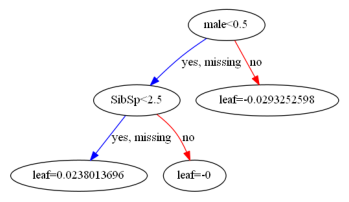

In [50]:
# plotting the first tree using the matplotlib library
import matplotlib.pyplot as plt

xgb.plot_tree(xg_reg1, num_trees=0)
plt.rcParams['figure.figsize'] = [50, 10]
plt.show()

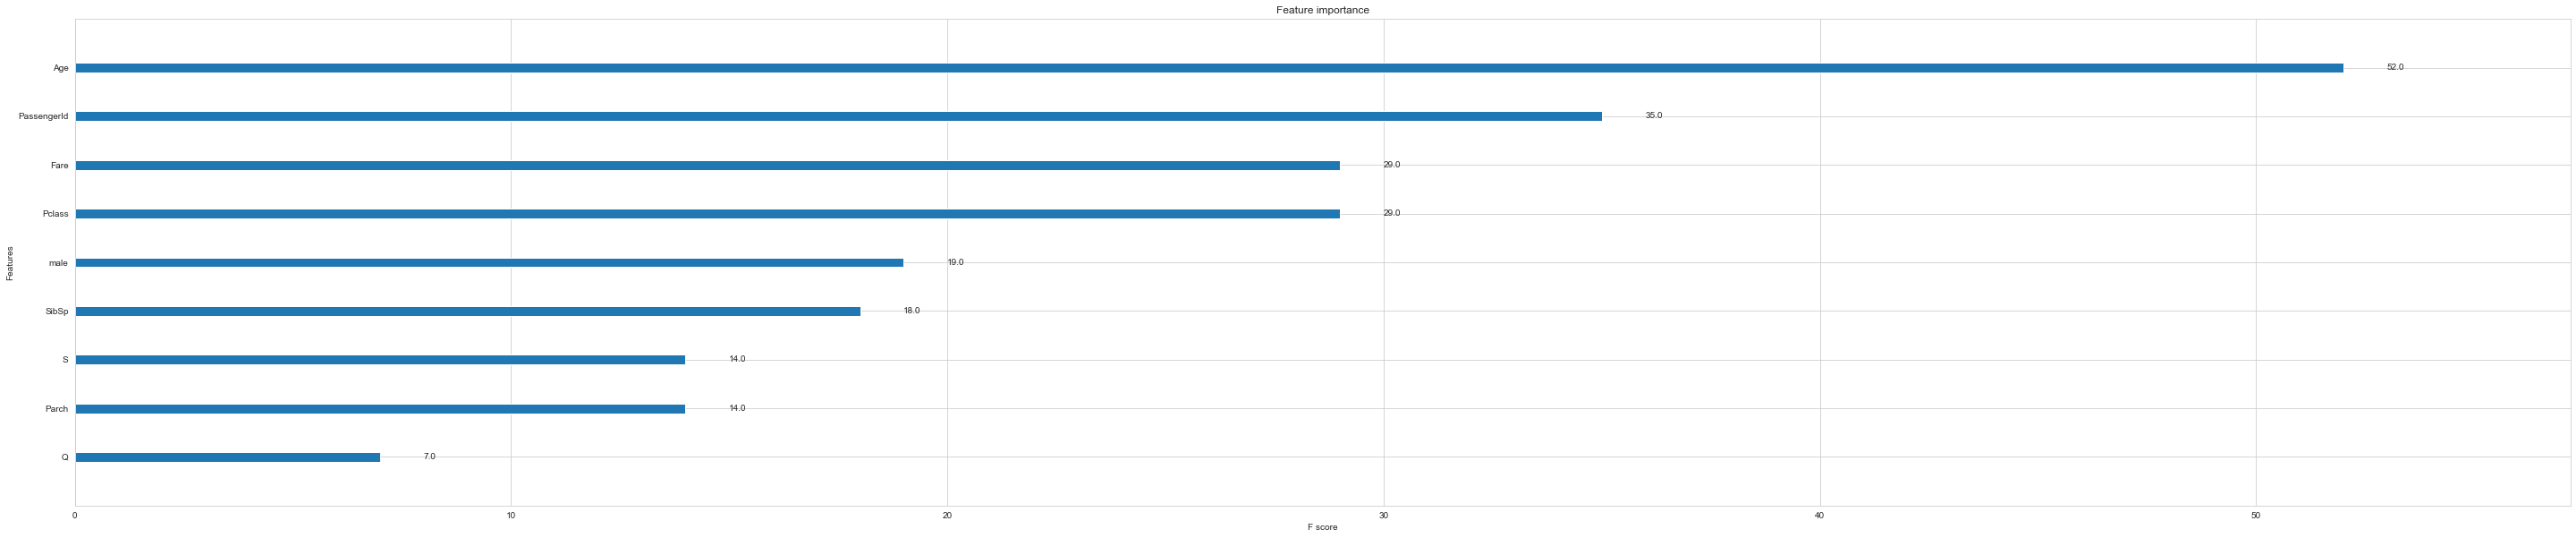

In [51]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

### Building a Random Forest Model


In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

model = RandomForestClassifier(n_estimators=5)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
#print("Validation Accuracy :", model.score(x_valid, y_valid))

# calculating the f1 score for the validation set
#print("F1 score :", f1_score(y_valid, y_pred))

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

Training Accuracy : 0.9726688102893891
[[134  27]
 [ 37  69]]
